In [20]:
<h3><a href="https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data" style="text-decoration: underline;">Dataset used</a></h3>

SyntaxError: invalid syntax (3349726049.py, line 1)

In [1]:
import pandas as pd

df= pd.read_csv("milk_quality_data.csv")
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [2]:
df.isnull().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [3]:
df.describe()

,ph,temperature,taste,odor,fat,turbidity,colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
df['grade']= df['grade'].map({'low': 0, 'medium': 1, 'high': 2})
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


<Axes: xlabel='ph', ylabel='Count'>

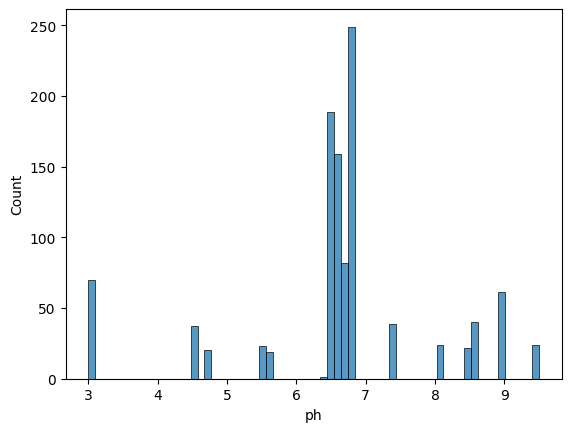

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(df.ph)

<Axes: xlabel='temperature', ylabel='Count'>

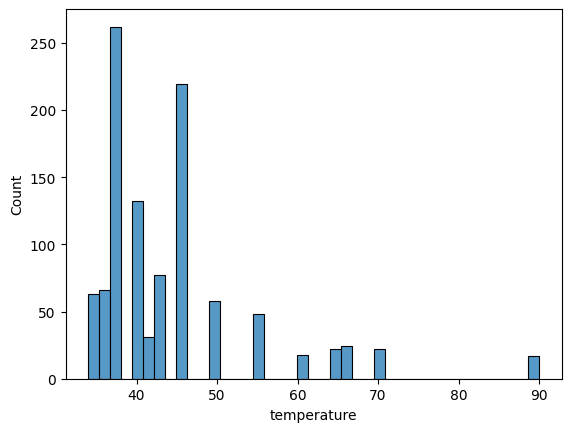

In [6]:
sns.histplot(df.temperature)

In [7]:
from sklearn.model_selection import train_test_split

X= df.drop("grade", axis= 1)
y= df["grade"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time

start= time.time()
model= LogisticRegression()
model.fit(X_train, y_train)
end= time.time()

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print("time: ", end-start)
print(report)

time:  0.05327463150024414
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       115
           1       0.75      0.87      0.81       127
           2       0.56      0.37      0.44        76

    accuracy                           0.70       318
   macro avg       0.67      0.65      0.65       318
weighted avg       0.68      0.70      0.68       318



C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.tree import DecisionTreeClassifier

start= time.time()
model= DecisionTreeClassifier()
model.fit(X_train, y_train)
end= time.time()

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print("time: ", end-start)
print(report)

time:  0.0037071704864501953
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       0.99      0.99      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [14]:
from sklearn.ensemble import GradientBoostingClassifier

start= time.time()
model= GradientBoostingClassifier(n_estimators= 50)
model.fit(X_train, y_train)
end= time.time()

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print("time: ", end-start)
print(report)

time:  0.35686254501342773
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.98      1.00      0.99       127
           2       0.99      0.99      0.99        76

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [15]:
from xgboost import XGBClassifier

start= time.time()
model= XGBClassifier(n_estimators= 50)
model.fit(X_train, y_train)
end= time.time()

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print("time: ", end-start)
print(report)

time:  0.46166229248046875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      0.99      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [19]:
start= time.time()
model= XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1, colsample_bytree= 0.5)
model.fit(X_train, y_train)
end= time.time()

y_pred= model.predict(X_test)
report= classification_report(y_test, y_pred)
print("time: ", end-start)
print(report)

time:  1.0006182193756104
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

